# Exercise
Let us generate random points from a given third order polinom plus noise:
$$ 1 - 8x + 2x^2 + 3x^3 + ɛ. $$
Fit a polinom of at most tenth order to the points, i.e. choose the best subset from the $ \{x,x^2, …, x^{10} \} $ set of predictors.

If two models use the same number of descriptive parameters, then the best one is chosen based on the usual metrics. Otherwise, we choose the best model based on the different information criteria:
- Mallow's $C_p$ (which is basically the same as Akaike - AIC)
- Bayes - BIC
- Adjusted $R^2$.

The more complicated the model, the more it fits to the train set, however, after a certain point it overfits the train set and the prediction error on the test set starts to grow.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(1)
x = np.ones((11,100))                   #row 0 is kept for convenient indexing, and used only to generate Y
x[1,:] = np.random.normal(0, 1, 100)    #X ~ N(0,1)
for k in range(2,11):
    x[k,:] = x[1,:]**k                  #predictor values, X^k in row k (k in {1, 2, ...,10})
eps = np.random.normal(0, 2, 100)       #eps ~ N(0,2)
beta_true = np.array([1, -8, 2, 3])     #true coefficients
y = beta_true @ x[:4,:] + eps

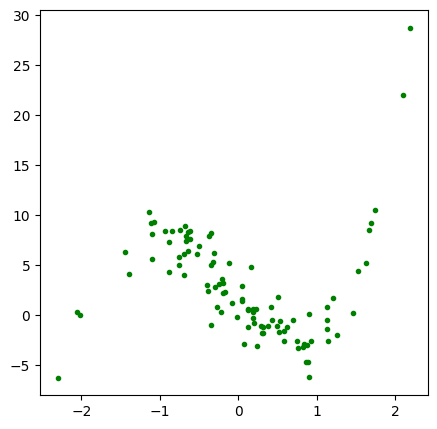

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')
plt.show()

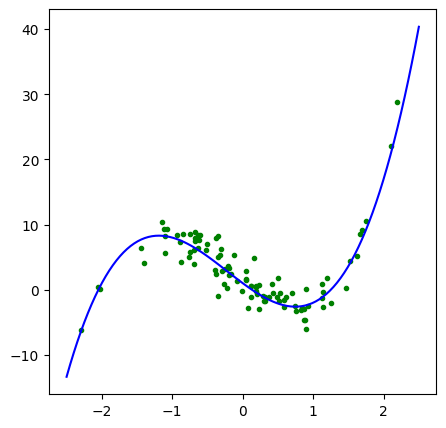

In [3]:
# Rajzoljuk ki az eredeti polinomot, ami alapján generáltuk a ponthalmazt!

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

plt.show()

# Best subset selection
All $2^{10}=1024$ subsets are visited systematically in a 10-fold embedded cycle (the number of predictors is: $p=10$).

The best $R^2$ are stored in vector $\text{R2}\in \mathbb{R}^{11}$, with $\text{R2}[k]$ being the best value found when $k$ predictors are used ($k \in \left\{0, 1, \dots, 10\right\}$). If a better value is found, it is replaced with it.

Array $\text{beta} \in \mathbb{R}^{11\times 11}$ stores the coefficients of the models: $\text{beta}[i,j]$ is the coefficient of $X^j$ when $i$ predictors are used ($i, j \in \left\{0, 1, \dots, 10\right\}$), so row $i$ contains (at least) $p-i$ zeros. When a better model is found (i.e. $\text{R2}[i]$ increases), then $\text{beta}[i,:]$ is first reset, then filled up with the coefficient estimators of the new model.

In [4]:
p = 10
beta = np.zeros((p+1,p+1))
R2 = np.zeros(p+1, dtype=np.float64)
beta[0,0] = y.mean()

for k1 in range(1,p+1):
    reg = LinearRegression().fit(x[[k1],:].T,y)
    if reg.score(x[[k1],:].T,y) > R2[1]:
        R2[1] = reg.score(x[[k1],:].T,y)
        beta[1,:] = 0
        beta[1,0] = reg.intercept_
        beta[1,k1] = reg.coef_
    for k2 in range(k1+1,p+1):
        reg = LinearRegression().fit(x[[k1,k2],:].T,y)
        if reg.score(x[[k1,k2],:].T,y) > R2[2]:
            R2[2] = reg.score(x[[k1,k2],:].T,y)
            beta[2,:] = 0
            beta[2,0] = reg.intercept_
            beta[2,[k1,k2]] = reg.coef_
        for k3 in range(k2+1,p+1):
            reg = LinearRegression().fit(x[[k1,k2,k3],:].T,y)
            if reg.score(x[[k1,k2,k3],:].T,y) > R2[3]:
                R2[3] = reg.score(x[[k1,k2,k3],:].T,y)
                beta[3,:] = 0
                beta[3,0] = reg.intercept_
                beta[3,[k1,k2,k3]] = reg.coef_
            for k4 in range(k3+1,p+1):
                reg = LinearRegression().fit(x[[k1,k2,k3,k4],:].T,y)
                if reg.score(x[[k1,k2,k3,k4],:].T,y) > R2[4]:
                    R2[4] = reg.score(x[[k1,k2,k3,k4],:].T,y)
                    beta[4,:] = 0
                    beta[4,0] = reg.intercept_
                    beta[4,[k1,k2,k3,k4]] = reg.coef_
                for k5 in range(k4+1,p+1):
                    reg = LinearRegression().fit(x[[k1,k2,k3,k4,k5],:].T,y)
                    if reg.score(x[[k1,k2,k3,k4,k5],:].T,y) > R2[5]:
                        R2[5] = reg.score(x[[k1,k2,k3,k4,k5],:].T,y)
                        beta[5,:] = 0
                        beta[5,0] = reg.intercept_
                        beta[5,[k1,k2,k3,k4,k5]] = reg.coef_
                    for k6 in range(k5+1,p+1):
                        reg = LinearRegression().fit(x[[k1,k2,k3,k4,k5,k6],:].T,y)
                        if reg.score(x[[k1,k2,k3,k4,k5,k6],:].T,y) > R2[6]:
                            R2[6] = reg.score(x[[k1,k2,k3,k4,k5,k6],:].T,y)
                            beta[6,:] = 0
                            beta[6,0] = reg.intercept_
                            beta[6,[k1,k2,k3,k4,k5,k6]] = reg.coef_
                        for k7 in range(k6+1,p+1):
                            reg = LinearRegression().fit(x[[k1,k2,k3,k4,k5,k6,k7],:].T,y)
                            if reg.score(x[[k1,k2,k3,k4,k5,k6,k7],:].T,y) > R2[7]:
                                R2[7] = reg.score(x[[k1,k2,k3,k4,k5,k6,k7],:].T,y)
                                beta[7,:] = 0
                                beta[7,0] = reg.intercept_
                                beta[7,[k1,k2,k3,k4,k5,k6,k7]] = reg.coef_
                            for k8 in range(k7+1,p+1):
                                reg = LinearRegression().fit(x[[k1,k2,k3,k4,k5,k6,k7,k8],:].T,y)
                                if reg.score(x[[k1,k2,k3,k4,k5,k6,k7,k8],:].T,y) > R2[8]:
                                    R2[8] = reg.score(x[[k1,k2,k3,k4,k5,k6,k7,k8],:].T,y)
                                    beta[8,:] = 0
                                    beta[8,0] = reg.intercept_
                                    beta[8,[k1,k2,k3,k4,k5,k6,k7,k8]] = reg.coef_
                                for k9 in range(k8+1,p+1):
                                    reg = LinearRegression().fit(x[[k1,k2,k3,k4,k5,k6,k7,k8,k9],:].T,y)
                                    if reg.score(x[[k1,k2,k3,k4,k5,k6,k7,k8,k9],:].T,y) > R2[9]:
                                        R2[9] = reg.score(x[[k1,k2,k3,k4,k5,k6,k7,k8,k9],:].T,y)
                                        beta[9,:] = 0
                                        beta[9,0] = reg.intercept_
                                        beta[9,[k1,k2,k3,k4,k5,k6,k7,k8,k9]] = reg.coef_
                                    for k10 in range(k9+1,p+1):
                                        reg = LinearRegression().fit(x[[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10],:].T,y)
                                        if reg.score(x[[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10],:].T,y) > R2[10]:
                                            R2[10] = reg.score(x[[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10],:].T,y)
                                            beta[10,:] = 0
                                            beta[10,0] = reg.intercept_
                                            beta[10,[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10]] = reg.coef_
print(R2)
print(beta)

C:\Users\Márton\AppData\Local\Temp\ipykernel_12540\4124189749.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[1,k1] = reg.coef_
C:\Users\Márton\AppData\Local\Temp\ipykernel_12540\4124189749.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[1,k1] = reg.coef_
C:\Users\Márton\AppData\Local\Temp\ipykernel_12540\4124189749.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[1,k1] = reg.coef_


[0.         0.27945848 0.69635427 0.88195452 0.88603724 0.88654209
 0.8891506  0.88960038 0.89007657 0.89066033 0.890753  ]
[[ 2.81381387e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.83993236e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.51683062e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.85423389e+00 -7.61821910e+00  0.00000000e+00  3.01842027e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.97197652e+00 -8.13721902e+00  0.00000000e+00  3.22030669e+00
   4.76741022e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.55389797e+00 -8.17984794e+00  1.31493475e+00  3.21075652e+00
   0.00000000e+00  0.00000000e+00  4.18971758e-02  0.00000000e+00
   0.0000000

C:\Users\Márton\AppData\Local\Temp\ipykernel_12540\4124189749.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[1,k1] = reg.coef_
C:\Users\Márton\AppData\Local\Temp\ipykernel_12540\4124189749.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[1,k1] = reg.coef_


In [5]:
# Számoljuk ki a Total Sum of Squares (TSS)-t!
# y vektornak az átlagától vett eltérések négyzetösszege
TSS = ((y - y.mean())**2).sum()
# Számoljuk ki a Residual Sum of Squares (RSS)-t!
# R2 = 1 - RSS/TSS
RSS = TSS * (1-R2)

In [6]:
reg = LinearRegression().fit(x[1:,:].T,y)
sigma2 = (y - reg.predict(x[1:,:].T)).std()**2       #sigma^2 estimated from full model
d = np.arange(11)                                    #vector containing the number of used predictors

Mallow's $C_p$:
$$C_p = \frac{1}{n}\left(\text{RSS} + 2d\hat{\sigma}^2\right)$$

Bayesian information criterion:
$$\text{BIC} = \frac{1}{n}\left(\text{RSS} + \log\left(n\right)d\hat{\sigma}^2\right)$$

Adjusted R2:
$$\text{adjusted}~R^2 = 1- \frac{RSS/\left(n-d-1\right)}{TSS/\left(n-1\right)}$$



In [7]:
# Számoljuk ki a C_p (AIC) vektort!
C_p = 0.01 * (RSS + 2*d*sigma2)
# Számoljuk ki a BIC vektort!
BIC = 0.01 * (RSS + np.log(100)*d*sigma2)
# Számoljuk ki az adjusted R2-t!
R2_adj = 1 - (RSS/(99-d)) / (TSS/99)

### Best subset selection with Mallow's $C_p$

The lowest $C_p$ determines the model with the lowest estimated test error. Find the best model according to $C_p$!

In [8]:
C_p

array([28.00923549, 20.2430156 ,  8.62728165,  3.48995907,  3.43680384,
        3.48386176,  3.4719979 ,  3.52059856,  3.56845921,  3.61330702,
        3.67190997])

In [9]:
# Ábrázoljuk a C_p vektor értékeit és találjuk meg az optimális modellt C_p szerint!

# Ábrázoljuk egy grafikonon az eredeti ponthalmazt, az eredeti polinomot, illetve a C_p szerinti legjobb polinomot!

[28.00923549 20.2430156   8.62728165  3.48995907  3.43680384  3.48386176
  3.4719979   3.52059856  3.56845921  3.61330702  3.67190997]


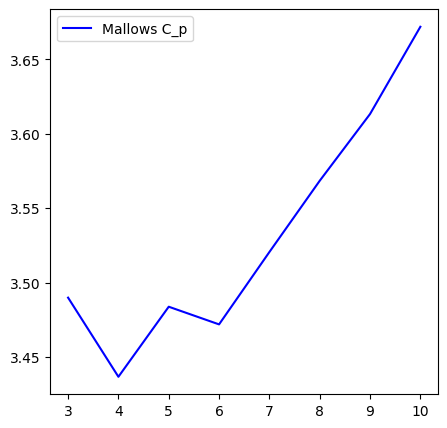

In [10]:
print(C_p)

plt.figure(figsize=(5,5))
plt.plot(d[3:], C_p[3:], 'b-', label='Mallows C_p')
plt.legend()
plt.show()

In [11]:
beta[np.argmin(C_p)]

array([ 1.55389797, -8.17984794,  1.31493475,  3.21075652,  0.        ,
        0.        ,  0.04189718,  0.        ,  0.        ,  0.        ,
        0.        ])

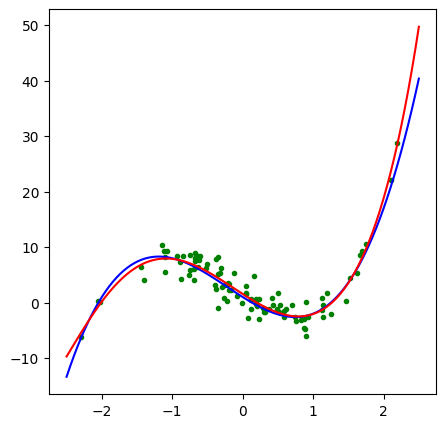

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_cp = beta[np.argmin(C_p)]
Y_Cp = [sum( [beta_cp[j]*(x**j) for j in range(len(beta_cp))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_Cp, 'r')

plt.show()

### Best subset selection with Bayesian information criterion

The lowest $\text{BIC}$ determines the model with the lowest estimated test error. Find the best model according to BIC!

In [13]:
# Ábrázoljuk a BIC vektor értékeit és találjuk meg az optimális modellt BIC szerint!
# Ábrázoljuk egy grafikonon az eredeti ponthalmazt, az eredeti polinomot, illetve a BIC szerinti legjobb polinomot!

[28.00923549 20.32273185  8.78671416  3.72910783  3.75566885  3.88244303
  3.95029542  4.07861233  4.20618924  4.3307533   4.46907251]


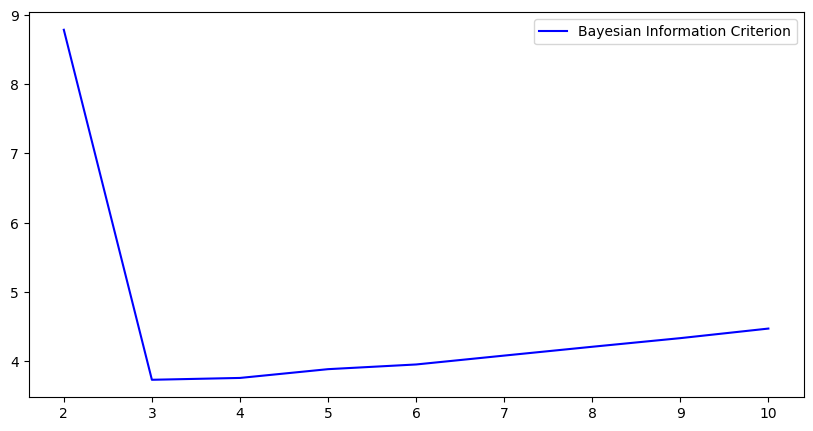

In [14]:
print(BIC)

plt.figure(figsize=(10,5))
plt.plot(d[2:], BIC[2:], 'b-', label='Bayesian Information Criterion')
plt.legend()
plt.show()

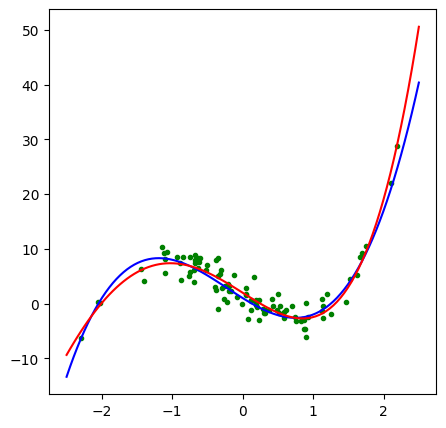

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_bic = beta[np.argmin(BIC)]
Y_BIC = [sum( [beta_bic[j]*(x**j) for j in range(len(beta_bic))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_BIC, 'r')

plt.show()

### Best subset selection with adjusted $R^2$

The largest $\text{adjusted}~R^2$ determines the model with the lowest estimated test error. Find the best model according to the adjusted $R^2$!

In [16]:
# Ábrázoljuk az adj. R2 vektor értékeit és találjuk meg az optimális modellt az adj. R2 szerint!
# Ábrázoljuk egy grafikonon az eredeti ponthalmazt, az eredeti polinomot, illetve az adj. R2 szerinti legjobb polinomot!

[0.         0.27210602 0.69009354 0.8782656  0.88123881 0.8805071
 0.88199903 0.8812004  0.88041297 0.87972636 0.87847806]


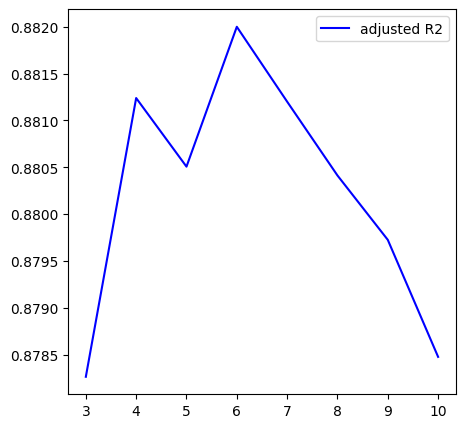

In [17]:
print(R2_adj)

plt.figure(figsize=(5,5))
plt.plot(d[3:], R2_adj[3:], 'b-', label='adjusted R2')
plt.legend()
plt.show()

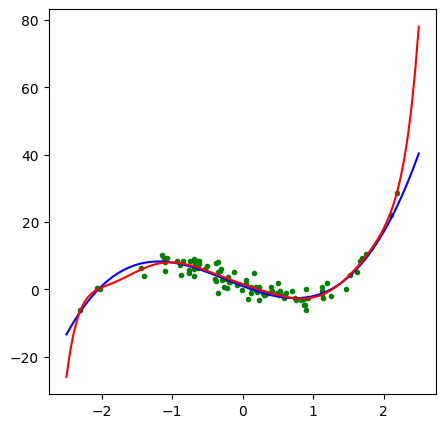

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_r2 = beta[np.argmax(R2_adj)]
Y_R2 = [sum( [beta_r2[j]*(x**j) for j in range(len(beta_r2))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_R2, 'r')

plt.show()

In [19]:
beta_r2

array([ 1.59861674, -7.33008642,  1.2152752 ,  0.        ,  0.        ,
        2.94288599,  0.        , -0.90416373,  0.0110389 ,  0.08776133,
        0.        ])

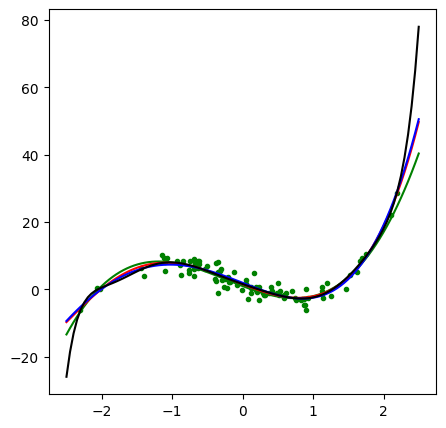

In [20]:
plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

plt.plot(X_TRUE, Y_TRUE, 'g')

plt.plot(X_TRUE, Y_Cp, 'r')
plt.plot(X_TRUE, Y_BIC, 'b')

plt.plot(X_TRUE, Y_R2, 'k')

plt.show()

In [21]:
print(beta_cp)
print(beta_bic)
print(beta_r2)

[ 1.55389797 -8.17984794  1.31493475  3.21075652  0.          0.
  0.04189718  0.          0.          0.          0.        ]
[ 1.97197652 -8.13721902  0.          3.22030669  0.47674102  0.
  0.          0.          0.          0.          0.        ]
[ 1.59861674 -7.33008642  1.2152752   0.          0.          2.94288599
  0.         -0.90416373  0.0110389   0.08776133  0.        ]


In [22]:
print(np.argmin(C_p))
print(np.argmin(BIC))
print(np.argmax(R2_adj))

4
3
6


# Forward stepwise selection

Predictors are added one by one to the model with $i$ predictors, and the best (highest $\text{R2}_\text{fw}$) is added to the model until all predictors are included. Best model is chosen according to Mallow's $C_p$, Bayesian information criterion, and adjusted $R^2$.


In [23]:
p = 10
beta_fw = np.zeros((p+1,p+1))
R2_fw = np.zeros(p+1)
beta_fw[0,0] = y.mean()
idx = set(np.arange(1,p+1))
used = set({})
pred_added = list([])

i=1
while idx != set({}):
    for k in idx:
        reg = LinearRegression().fit(x[sorted(list(used | {k})),:].T,y)
        if reg.score(x[sorted(list(used | {k})),:].T,y) > R2_fw[i]:
            R2_fw[i] = reg.score(x[sorted(list(used | {k})),:].T,y)
            beta_fw[i,:] = 0
            beta_fw[i,0] = reg.intercept_
            beta_fw[i,sorted(list(used | {k}))] = reg.coef_
            k_best = k
    used |= {k_best}
    idx -= {k_best}
    pred_added.append(k_best)
    i += 1

print('Predictors added in this order:', pred_added)
print(R2_fw)
print(beta_fw)

Predictors added in this order: [7, 1, 2, 3, 6, 10, 4, 8, 9, 5]
[0.         0.27945848 0.52454036 0.78166137 0.87889177 0.8860397
 0.88648469 0.88738904 0.88831755 0.88845783 0.890753  ]
[[ 2.81381387e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.83993236e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.51683062e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.08131715e+00 -3.68498875e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  9.34792531e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.18627356e+00 -4.43835315e+00  2.47355691e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.07060272e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25729714e+00 -8.21942709e+00  2.04387408e+00  3.18966169e+00
   0.00000000e+

In [25]:
RSS_fw = TSS * (1-R2_fw)
C_p_fw = 0.01 * (RSS_fw + 2*d*sigma2)
BIC_fw = 0.01 * (RSS_fw + np.log(100)*d*sigma2)
R2_adj_fw = 1 - (RSS_fw/(99-d)) / (TSS/99)

### Forward stepwise selection with Mallow's $C_p$


In [26]:
# Ábrázoljuk a C_p vektor értékeit és találjuk meg az optimális modellt C_p szerint!
# Ábrázoljuk egy grafikonon az eredeti ponthalmazt, az eredeti polinomot, illetve a C_p szerinti legjobb polinomot!

[28.00923549 20.2430156  13.439658    6.29909369  3.63694296  3.49793338
  3.54666817  3.58253637  3.61772803  3.67499746  3.67190997]


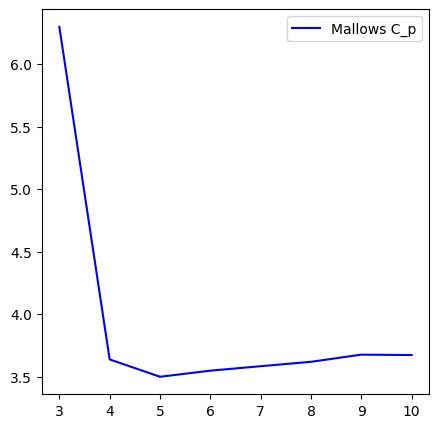

In [27]:
print(C_p_fw)

plt.figure(figsize=(5,5))
plt.plot(d[3:], C_p_fw[3:], 'b-', label='Mallows C_p')
plt.legend()
plt.show()

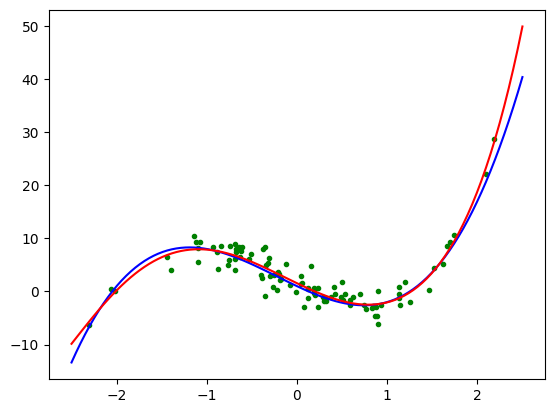

In [28]:
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_cp_fw = beta_fw[np.argmin(C_p_fw)]
Y_Cp_fw = [sum( [beta_cp_fw[j]*(x**j) for j in range(len(beta_cp_fw))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_Cp_fw, 'r')

plt.show()

### Forward stepwise selection with Bayesian information criterion


In [29]:
# Ábrázoljuk a BIC vektor értékeit és találjuk meg az optimális modellt BIC szerint!
# Ábrázoljuk egy grafikonon az eredeti ponthalmazt, az eredeti polinomot, illetve a BIC szerinti legjobb polinomot!

[28.00923549 20.32273185 13.59909051  6.53824245  3.95580797  3.89651465
  4.02496569  4.14055014  4.25545806  4.39244373  4.46907251]


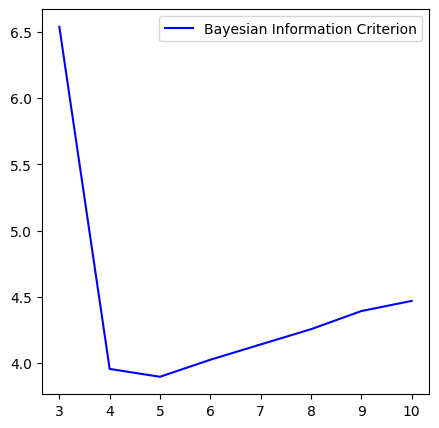

In [30]:
print(BIC_fw)

plt.figure(figsize=(5,5))
#plt.plot(d[3:], C_p_fw[3:], 'g-', label='Mallows C_p')
plt.plot(d[3:], BIC_fw[3:], 'b-', label='Bayesian Information Criterion')
plt.legend()
plt.show()

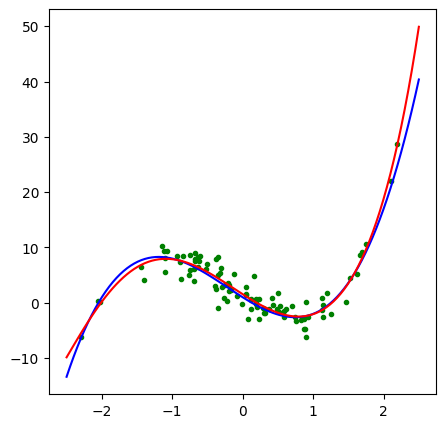

In [31]:
plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_bic_fw = beta_fw[np.argmin(BIC_fw)]
Y_BIC_fw = [sum( [beta_bic_fw[j]*(x**j) for j in range(len(beta_bic_fw))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_BIC_fw, 'r')

plt.show()

### Forward stepwise selection with adjusted $R^2$

In [32]:
# Ábrázoljuk az adj. R2 vektor értékeit és találjuk meg az optimális modellt az adj. R2 szerint!
# Ábrázoljuk egy grafikonon az eredeti ponthalmazt, az eredeti polinomot, illetve az adj. R2 szerinti legjobb polinomot!

[0.         0.27210602 0.51473707 0.77483828 0.87379248 0.87997798
 0.87916112 0.87882082 0.87849931 0.87730361 0.87847806]


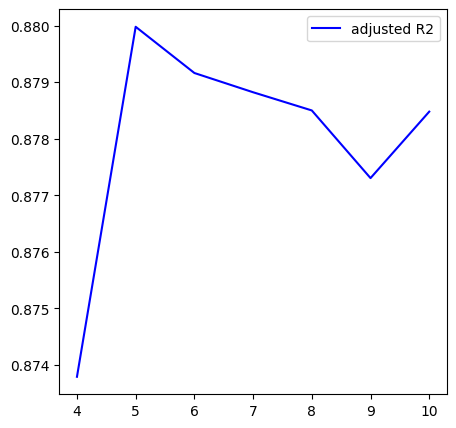

In [33]:
print(R2_adj_fw)

plt.figure(figsize=(5,5))
plt.plot(d[4:], R2_adj_fw[4:], 'b-', label='adjusted R2')
plt.legend()
plt.show()

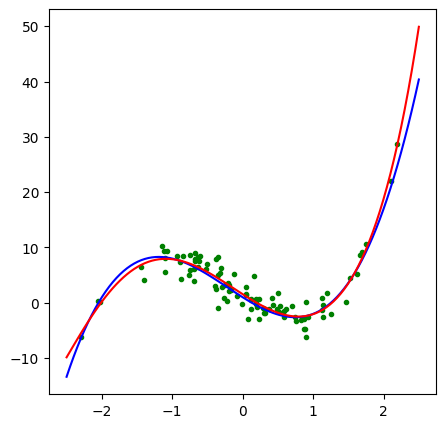

In [34]:
plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_r2_fw = beta_fw[np.argmax(R2_adj_fw)]
Y_R2_fw = [sum( [beta_r2_fw[j]*(x**j) for j in range(len(beta_r2_fw))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_R2_fw, 'r')

plt.show()

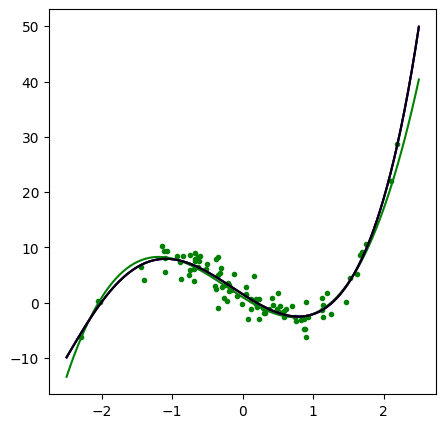

In [35]:
plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

plt.plot(X_TRUE, Y_TRUE, 'g')

plt.plot(X_TRUE, Y_Cp_fw, 'r')
plt.plot(X_TRUE, Y_BIC_fw, 'b')

plt.plot(X_TRUE, Y_R2_fw, 'k')

plt.show()

In [36]:
print(beta_cp_fw)
print(beta_bic_fw)
print(beta_r2_fw)

[ 1.55364301e+00 -8.16463946e+00  1.31671801e+00  3.19579462e+00
  0.00000000e+00  0.00000000e+00  4.19423737e-02  5.84358488e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[ 1.55364301e+00 -8.16463946e+00  1.31671801e+00  3.19579462e+00
  0.00000000e+00  0.00000000e+00  4.19423737e-02  5.84358488e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[ 1.55364301e+00 -8.16463946e+00  1.31671801e+00  3.19579462e+00
  0.00000000e+00  0.00000000e+00  4.19423737e-02  5.84358488e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [37]:
print(np.argmin(C_p_fw))
print(np.argmin(BIC_fw))
print(np.argmax(R2_adj_fw))

5
5
5


# Backward stepwise selection

Predictors are removed one by one from the model with $i$ predictors, and the best (with highest $\text{R2}_\text{bw}$) is excluded from the model until all predictors are gone. Best model is chosen according to Mallow's $C_p$, Bayesian information criterion, and adjusted $R^2$.

In [38]:
p = 10
beta_bw = np.zeros((p+1,p+1))
R2_bw = np.zeros(p+1)
beta_bw[0,0] = y.mean()
reg = LinearRegression().fit(x[1:,:].T,y)
R2_bw[10] = reg.score(x[1:,:].T,y)
beta_bw[10,0] = reg.intercept_
beta_bw[10,1:] = reg.coef_

idx = set(np.arange(1,p+1))
pred_removed = list([])

i=9
while len(idx) > 1:
    for k in idx:
        reg = LinearRegression().fit(x[sorted(list(idx - {k})),:].T,y)
        if reg.score(x[sorted(list(idx - {k})),:].T,y) > R2_bw[i]:
            R2_bw[i] = reg.score(x[sorted(list(idx - {k})),:].T,y)
            beta_bw[i,:] = 0
            beta_bw[i,0] = reg.intercept_
            beta_bw[i,sorted(list(idx - {k}))] = reg.coef_
            k_best = k
    idx -= {k_best}
    pred_removed.append(k_best)
    i += -1

print('Predictors removed in this order:', pred_removed)
print(R2_bw)
print(beta_bw)

Predictors removed in this order: [3, 10, 8, 4, 2, 9, 7, 6, 1]
[0.         0.26935465 0.61360733 0.82062113 0.8561591  0.87927896
 0.88881748 0.88960038 0.89007657 0.89066033 0.890753  ]
[[ 2.81381387  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 2.76769693  0.          0.          0.          0.          0.25273077
   0.          0.          0.          0.          0.        ]
 [ 3.00800929 -4.75358002  0.          0.          0.          0.51398952
   0.          0.          0.          0.          0.        ]
 [ 2.30543608 -5.17955747  0.          0.          0.          0.58012015
   0.11015504  0.          0.          0.          0.        ]
 [ 2.24765041 -6.3742308   0.          0.          0.          1.41584496
   0.09445923 -0.16840844  0.          0.          0.        ]
 [ 2.12754394 -7.52099261  0.          0.          0.          3.42734321
   0.10669751 -1.11519994  0.          0.11107486  0.        ]

In [39]:
RSS_bw = TSS * (1-R2_bw)
C_p_bw = 0.01 * (RSS_bw + 2*d*sigma2)
BIC_bw = 0.01 * (RSS_bw + np.log(100)*d*sigma2)
R2_adj_bw = 1 - (RSS_bw/(99-d)) / (TSS/99)

### Backward stepwise selection with Mallow's $C_p$

[28.00923549 20.5260161  10.94496027  5.20786038  4.27366761  3.6872965
  3.48132842  3.52059856  3.56845921  3.61330702  3.67190997]


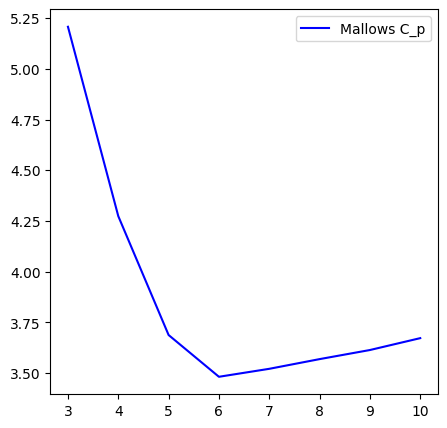

In [40]:
print(C_p_bw)

plt.figure(figsize=(5,5))
plt.plot(d[3:], C_p_bw[3:], 'b-', label='Mallows C_p')
plt.legend()
plt.show()

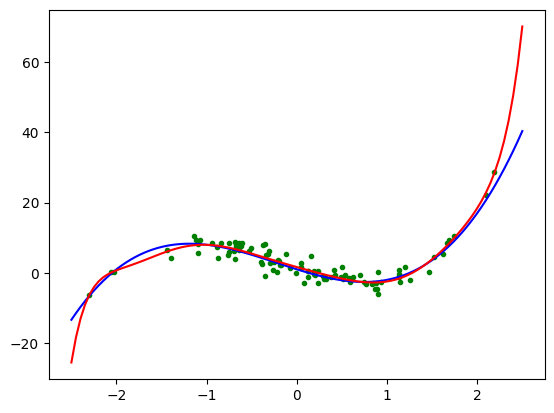

In [41]:
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_cp_bw = beta_bw[np.argmin(C_p_bw)]
Y_Cp_bw = [sum( [beta_cp_bw[j]*(x**j) for j in range(len(beta_cp_bw))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_Cp_bw, 'r')

plt.show()

### Backward stepwise selection with Bayesian information criterion


[28.00923549 20.60573235 11.10439277  5.44700914  4.59253263  4.08587776
  3.95962594  4.07861233  4.20618924  4.3307533   4.46907251]


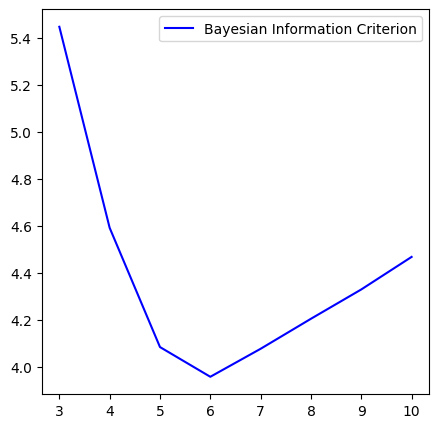

In [42]:
print(BIC_bw)

plt.figure(figsize=(5,5))
#plt.plot(d[3:], C_p_bw[3:], 'g-', label='Mallows C_p')
plt.plot(d[3:], BIC_bw[3:], 'b-', label='Bayesian Information Criterion')
plt.legend()
plt.show()

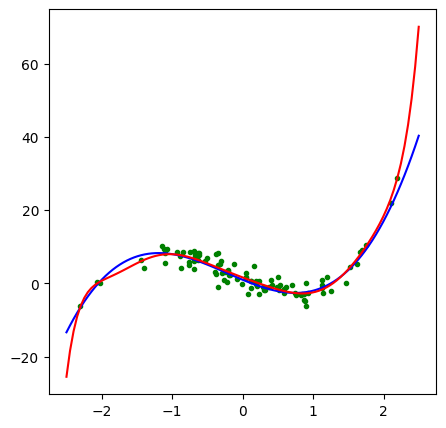

In [43]:
plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_bic_bw = beta_bw[np.argmin(BIC_bw)]
Y_BIC_bw = [sum( [beta_bic_bw[j]*(x**j) for j in range(len(beta_bic_bw))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_BIC_bw, 'r')

plt.show()

### Backward stepwise selection with adjusted $R^2$

[0.         0.26189909 0.60564047 0.81501554 0.85010264 0.87285763
 0.88164441 0.8812004  0.88041297 0.87972636 0.87847806]


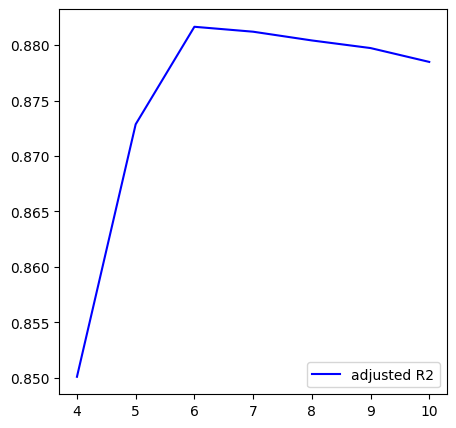

In [44]:
print(R2_adj_bw)

plt.figure(figsize=(5,5))
plt.plot(d[4:], R2_adj_bw[4:], 'b-', label='adjusted R2')
plt.legend()
plt.show()

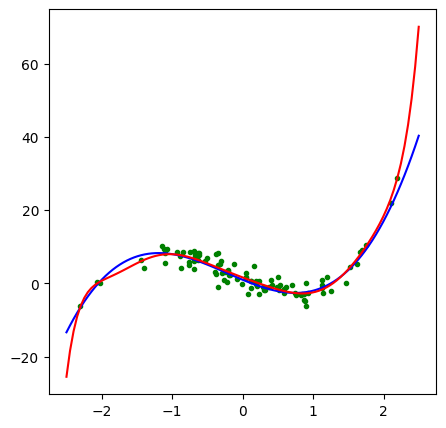

In [45]:
plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

X_TRUE = np.linspace(-2.5,2.5,100)
beta_true = np.array([1, -8, 2, 3])
Y_TRUE =   [sum( [beta_true[j] * (x**j) for j in range(len(beta_true))] ) for x in X_TRUE]
plt.plot(X_TRUE, Y_TRUE, 'b')

beta_r2_bw = beta_bw[np.argmax(R2_adj_bw)]
Y_R2_bw = [sum( [beta_r2_bw[j]*(x**j) for j in range(len(beta_r2_bw))]) for x in X_TRUE]
plt.plot(X_TRUE, Y_R2_bw, 'r')

plt.show()

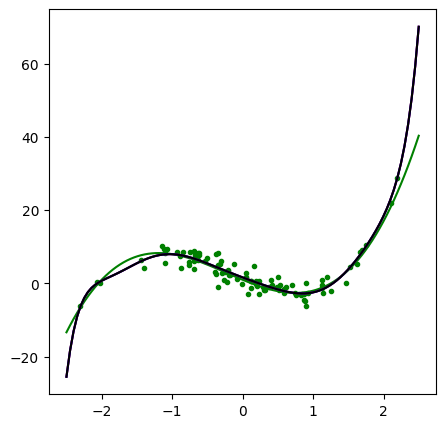

In [46]:
plt.figure(figsize=(5,5))
plt.plot(x[1,:], y, 'g.')

plt.plot(X_TRUE, Y_TRUE, 'g')

plt.plot(X_TRUE, Y_Cp_bw, 'r')
plt.plot(X_TRUE, Y_BIC_bw, 'b')

plt.plot(X_TRUE, Y_R2_bw, 'k')

plt.show()

In [47]:
print(beta_cp_bw)
print(beta_bic_bw)
print(beta_r2_bw)

[ 1.63949986 -7.27021837  1.06169525  0.          0.          2.80490779
  0.05752133 -0.8347712   0.          0.07906716  0.        ]
[ 1.63949986 -7.27021837  1.06169525  0.          0.          2.80490779
  0.05752133 -0.8347712   0.          0.07906716  0.        ]
[ 1.63949986 -7.27021837  1.06169525  0.          0.          2.80490779
  0.05752133 -0.8347712   0.          0.07906716  0.        ]


In [48]:
print(np.argmin(C_p_bw))
print(np.argmin(BIC_bw))
print(np.argmax(R2_adj_bw))

6
6
6


# Lasso regression

The Lasso model with 10-fold cross validation is used on normalized predictors ($\tilde{X}$), and the optimum $\lambda$ Lasso-parameter is selected for the model. The attributes of the $\text{LassoCV}$ function contain the mean squared errors of the different validation sets, from which the cross validation error is easily obtained by taking the average. The optimum value of $\lambda$ and the minimum CV error are
$$\lambda_{\text{opt}} = 0.00916 \quad \text{and} \quad
\text{CV}_{\min} = 3.577.$$
The optimum Lasso model uses the first six predictors:
$$\hat{Y} = -7.11\tilde{X} + 1.22\tilde{X}^2 + 7.83\tilde{X}^3 + 0.72\tilde{X}^4 + 0.22\tilde{X}^5 + 0.44\tilde{X}^6.$$

Steps:
1. Linear regression on independent variables
2. L1 regularization: adding a penalty term based on the sum of absolute values of the coefficients
3. Objective function: minimizing the sum of the squared differences between the predicted values and the actual values, while also minimizing the L1 regularization term -> shrinks the coefficients towards 0
4. Tuning the regularization parameter $\lambda$

lambda_opt = 0.00916137771931739 min CV error = 3.5769947292827124
[-7.10862787  1.22002384  7.83439856  0.72063029  0.21635359  0.43567344
  0.          0.          0.         -0.        ]


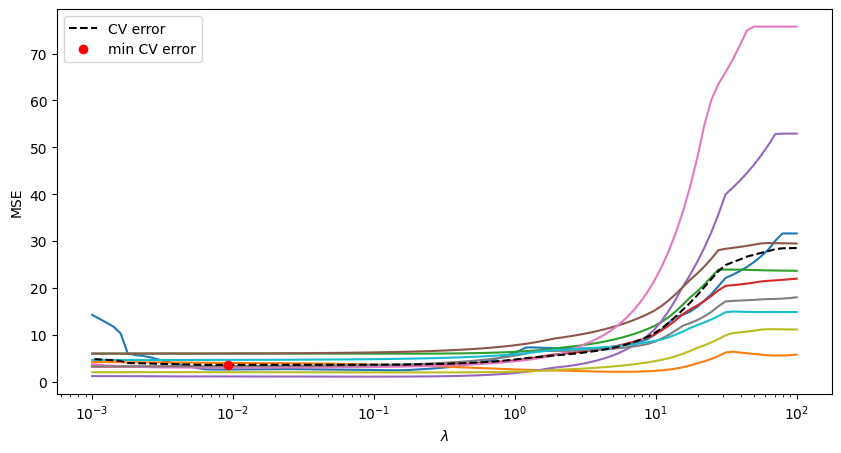

In [49]:
from sklearn.linear_model import LassoCV

x_mean = np.zeros(11)
x_std = np.ones(11)
for i in range(1,11):
    x_mean[i] = x[i,:].mean()                                                   #row means
    x_std[i] = x[i,:].std()                                                     #row standard deviations

x_tld = (x.T - x_mean)/x_std                                                    #x-tilde: X standardized (centered and scaled)

alphas = 10**np.linspace(2, -3, 100)

reg_cv = LassoCV(cv=10,max_iter=10000).fit(x_tld[:,1:],y)
alpha_opt = reg_cv.alpha_  #The amount of penalization chosen by cross validation.
cv_error = reg_cv.mse_path_.sum(axis=1)/10  #Mean square error for the test set on each fold, varying alpha.
mse_opt = min(cv_error)
print('lambda_opt =', alpha_opt, 'min CV error =', mse_opt)
print(reg_cv.coef_)  #Parameter vector

plt.figure(figsize=(10,5))
plt.plot(alphas,reg_cv.mse_path_,'-')
plt.plot(alphas, cv_error, 'k--', label='CV error')
plt.plot(alpha_opt, mse_opt, 'ro', label='min CV error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.legend(loc='upper left')
plt.show()